In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UsedCars_PricePred.xlsx to UsedCars_PricePred (1).xlsx


In [ ]:
# Importing housing train dataset csv file
import io
df = pd.read_excel(io.BytesIO(uploaded['UsedCars_PricePred.xlsx']))

In [ ]:
df.head()

,Car Model,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,...,Rear Brake Type,Cargo Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price(Rs)
0,Hyundai Creta 1.4 E Plus CRDi,2018,Diesel,"85,000 kms",1396 CC,Manual,22.1,88.7,219.7,5,...,Drum,NaN,U2 CRDI Engine,4,NaN,NaN,4270,1780,1665,₹ 9.30 Lakh
1,Renault Kiger RXZ,2022,Petrol,"7,000 kms",999 CC,Manual,19.17,71.01,96,16,...,16,NaN,1.0L energy,3,NaN,NaN,3991,1750,1605,₹ 8.31 Lakh
2,Honda Jazz 1.2 V i VTEC,2017,Petrol,"25,035 kms",1199 CC,Manual,18.7,88.7,110,15,...,Drum,354-litres,i-VTEC Petrol Engine,4,NaN,NaN,3955,1694,1544,₹ 5.65 Lakh
3,Maruti Ciaz 1.4 Alpha,2018,Petrol,"13,000 kms",1373 CC,Manual,20.73,91.1,130,16,...,Drum,510-litres,k14B VVT Engine,4,No,No,4490,1730,1485,₹ 8.35 Lakh
4,Maruti Swift ZXI,2014,Petrol,"25,600 kms",1197 CC,Manual,18.6,85.8,114,15,...,Drum,NaN,K Series Petrol Engine,4,No,NaN,3850,1695,1530,₹ 4.65 Lakh


In [ ]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
8709
Number of columns in the given dataset:


24

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8709 entries, 0 to 8708
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Model                8709 non-null   object
 1   Make Year                6239 non-null   object
 2   Fuel Type                8706 non-null   object
 3   KMs driven               8706 non-null   object
 4   Engine Displacement(CC)  8618 non-null   object
 5   Transmission             8583 non-null   object
 6   Milage(kmpl)             8621 non-null   object
 7   Max Power(bhp)           8618 non-null   object
 8   Torque(Nm)               8612 non-null   object
 9   Seating Capacity         7102 non-null   object
 10  Color                    8303 non-null   object
 11  Gear Box                 8571 non-null   object
 12  Steering Type            8568 non-null   object
 13  Front Brake Type         8562 non-null   object
 14  Rear Brake Type          8557 non-null  

In [ ]:
# As we have 24 columns lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{object: ['Car Model', 'Make Year', 'Fuel Type', 'KMs driven', 'Engine Displacement(CC)', 'Transmission', 'Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Cargo Volume', 'Engine Type', 'No of Cylinder', 'Turbo Charger', 'Super Charger', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price(Rs)']}

**This dataset contain 8709 rows and 24 columns**

**We have all feature here with object datatypes which actually have to be integer type**

**Our target feature is Price**

# Feature Engineering to convert feature in appropriate datatypes

**1. Transfoming datatypes of KMs driven into int type**

In [ ]:
df['KMs driven'] = df['KMs driven'].map(lambda x : str(x).replace('kms',''))

In [ ]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.split(' ')[0])

In [ ]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.replace(',',''))

In [ ]:
df.isin(['????','?????','-','null','NA',' ']).sum().any()

True

In [ ]:
df.drop(index= 1971,axis = 0,inplace=True)

In [ ]:
df['KMs driven'].isnull().sum()

0

In [ ]:
df.drop(index= 4201,axis = 0,inplace=True) # Need to drop nan value to convert it into numeric datatype

In [ ]:
df.drop(index= 4672,axis = 0,inplace=True)

In [ ]:
df['KMs driven']=pd.to_numeric(df['KMs driven'])

In [ ]:
df['KMs driven'].dtypes

dtype('int64')

**2. Transfoming datatypes of Engine Displacement(CC) into int type**

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('CC',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('bhp@',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('bhp',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('rpm',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Power Windows Rear',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Remote Trunk Opener',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Low Fuel Warning Light',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Bhp',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Nm',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('Remote Fuel Lid Opener',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('nan',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('165 [224] at 3800',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('1415000',''))

In [ ]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : str(x).replace('187.744200-6000',''))

In [ ]:
df['Engine Displacement(CC)'] = pd.to_numeric(df['Engine Displacement(CC)'])

In [ ]:
df['Engine Displacement(CC)'].dtypes

dtype('float64')

**3.Transfoming datatypes of 'Milage(kmpl)' into float type**

In [ ]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : str(x).replace('km/kg',''))

In [ ]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('CC',''))

In [ ]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('bhp',''))

In [ ]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('Power Steering',''))

In [ ]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('nan',''))

In [ ]:
df['Milage(kmpl)'] = pd.to_numeric(df['Milage(kmpl)'])

In [ ]:
df['Milage(kmpl)'].dtypes

dtype('float64')

**4. Transfoming datatypes of Max Power into float type**

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('118PS at 6,600 rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('80 PS at 5200 rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('66(90) / 4000','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('85 PS at 6000rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('65 PS at 5500 rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('97.96Nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('52 PS','52')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('843750rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('ps','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('400 Nm /2000 rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('100PS at 5,500rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('320nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('90PS at 4000rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('132/4000-6000','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('380nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('143.8nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('85ps','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('245nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('Air Conditioner','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('63 HP at 3200 rpm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('250nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('96.1Nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('60 PS','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('250nm','')

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace(dict.fromkeys(['95.2nm','300nm','171 PS','75 PS','40nm','90 PS','84Nm','250Nm','112 at 3800 rpm','400nm','500Nm','75PS','58 PS','70  at 4000 rpm','450Nm','63 PS','94 PS','350Nm'], ''))

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace(dict.fromkeys(['242nm','78Nm','144nm','132 PS','70  at 5400 rpm','113.8Nm','83 PS','700nm','70.40Bhp','90(66)','480nm','170PS','75 PS at 4000 rpm','319Nm','90ps','85 PS','220nm','78 kW','Bhp','65 Ps','105 PS at 5250 rpm','110 PS at 4000 RPM','71 PS at 4500 rpm','125ps','800Nm','152 PS'], ''))

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace(dict.fromkeys(['35 Bhp','240nm','75.09BHP','103.2 PS at 5500 RPM','420Nm','55 Bhp','105Nm','65.3 PS','80.5-83.1','61 PS','70Nm','395Nm','Bhp','91Nm','430Nm','hbp','420nm','75  at 5400 rpm'], ''))

In [ ]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace(dict.fromkeys(['240Nm','75.6hbp','167.67Bhp'], ''))

In [ ]:
df['Max Power(bhp)'] = pd.to_numeric(df['Max Power(bhp)'])

In [ ]:
df['Max Power(bhp)'].dtypes

dtype('float64')

**5. Transfoming datatypes of Torque into float type**

In [ ]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace(dict.fromkeys(['Nm','nm','NM','kg-m','kgm','320/1500â??3900','24 KGM at 1900-2750 RPM','135  at 2500 rpm','190  at 1750 rpm','153  at 3800 rpm'], ''))

In [ ]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : str(x).rstrip('nm'))

In [ ]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : str(x).rstrip('NM'))

In [ ]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace(dict.fromkeys(['146 at 4800 rp','11.4 kgm at 4,000 rp','22.4 kgm at 1750-2750rp','180  at 1440-1500rp','Heater', '260  at 1800-2200 rp','155  at 1600-2800 rp','108  at 3000 rp','18.5 kg-','13.1 kg','110 (11.2)','35 bhp'],''))

In [ ]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace(dict.fromkeys(['na','4','R16','6.1 kg','13.9 kgm at 4200 rp', '24 kg','Digital Odometer','13.5 kg','113 at 4500rp','R18','210 / 1900','96  at 3000 rp','14.9 KGM at 3000 RP','110  at 3750 rp'],''))

In [ ]:
df['Torque(Nm)'] = pd.to_numeric(df['Torque(Nm)'])

In [ ]:
df['Torque(Nm)'].dtypes

dtype('float64')

**6. Transfoming datatypes of Seating capacity into float type**

In [ ]:
df['Seating Capacity'] = df['Seating Capacity'].replace(dict.fromkeys(['16','15','14','17','13', '18','R16','Power','Electric','12','R17','R15','19','Fog Lights Front','R18','20','Electronic','Manually Adjustable Exterior Rear View Mirror','5.1','Disc','Adjustable Head Lights','4.6','245kmph','Manual','Power Adjustable Exterior Rear View Mirror'],'5'))

In [ ]:
df['Seating Capacity'] = pd.to_numeric(df['Seating Capacity'])

In [ ]:
df['Seating Capacity'].dtypes

dtype('float64')

**7. Transfoming datatypes of vehicle length into float type**

In [ ]:
df['Length(mm)'] = df['Length(mm)'].str.replace(',','')

In [ ]:
df['Length(mm)'] = df['Length(mm)'].replace(dict.fromkeys(['5','Air Conditioner','5 Speed','1085kg','2014kg','8 Speed'],''))

In [ ]:
df['Length(mm)'] = pd.to_numeric(df['Length(mm)'])

In [ ]:
df['Length(mm)'].dtypes

dtype('float64')

**8. Transfoming datatypes of Vehicle Width(mm) into float type**

In [ ]:
df['Width(mm)'] = df['Width(mm)'].str.replace(',','')

In [ ]:
df['Width(mm)'] = df['Width(mm)'].replace(dict.fromkeys(['Power','Heater','FWD','2WD','RWD','Digital Odometer'],''))

In [ ]:
df['Width(mm)'] = pd.to_numeric(df['Width(mm)'])

In [ ]:
df['Width(mm)'].dtypes

dtype('float64')

**9. Transfoming datatypes of Vehicle Height(mm) into float type**

In [ ]:
df['Height(mm)'] = df['Height(mm)'].str.replace(',','')

In [ ]:
df['Height(mm)'] = df['Height(mm)'].replace(dict.fromkeys(['TubelessRadial','5','Adjustable Steering','1498-1501','Electronic Multi Tripmeter','Digital Odometer','Tachometer'],''))

In [ ]:
df['Height(mm)'] = df['Height(mm)'].str.replace('Â 1485','1485')

In [ ]:
df['Height(mm)'] = pd.to_numeric(df['Height(mm)'])

In [ ]:
df['Height(mm)'].dtypes

dtype('float64')

**10. Transfoming datatypes of Price(Rs) into float type**

In [ ]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Lakh*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Cr*','10000000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace(',','')
df['Price(Rs)'] = df['Price(Rs)'].str.replace('₹','')

In [ ]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('10000000ore','')

In [ ]:
df[['a','b']] = df['Price(Rs)'].str.split(expand=True)
df['a'] = df['a'].astype("float")
df['b'] = df['b'].astype("float")

In [ ]:
df['b'] = df['b'].fillna(value = 1)
df["Price (Rs.)"] = df['a'] * df['b']

In [ ]:
df.drop(columns=['Price(Rs)','a','b'], inplace = True)

**11. Feature Engineering on Make Year column**

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys(['1197','1248','998 c','1498','1497','2179','1199','1086','1198','1582','1493','1968','1461','1591','1798','1396','2755','1950','796 c','1373','2143','2494','1956','1462','2993','799 c','1120','1196','2982','1598','999 c','2694','Manua','936 c','1496','2184','1586','1298','2987','1364','1368'],''))

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys(['1197','1248','Autom','814 c','995 c'],''))

In [ ]:
df['Make Year'] = df['Make Year'].replace(1197.0,'')

In [ ]:
df['Make Year'] = df['Make Year'].replace(1248.0,'')
df['Make Year'] = df['Make Year'].replace(1248.0,'')
df['Make Year'] = df['Make Year'].replace(1498.0,'')
df['Make Year'] = df['Make Year'].replace(1497.0,'')
df['Make Year'] = df['Make Year'].replace(2179.0,'')
df['Make Year'] = df['Make Year'].replace(1199.0,'')
df['Make Year'] = df['Make Year'].replace(1582.0,'')
df['Make Year'] = df['Make Year'].replace(1198.0,'')

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys([2993.0,1120.0,2982.0],''))

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys([1086.0,1995.0,1493.0,1968.0,1461.0,1591.0,1798.0,1396.0,2755.0,1950.0,1373.0,1956.0,1462.0,2494.0,2143.0,1196.0,1598.0,2694.0,1586.0,2987.0,1298.0,2184.0,1496.0,1364.0,1368.0,1061.0,1799.0],''))

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys([3198.0,1451.0,2967.0,2393.0,1395.0,1984.0,1150.0,1353.0,2354.0,2199.0,1796.0,1399.0,1499.0,1596.0,2953.0,1047.0,1991.0,2400.0,4806.0,2925.0,1390.0,2498.0,2499.0,2995.0,2477.0],''))

In [ ]:
df['Make Year'] = df['Make Year'].replace(dict.fromkeys([2497.0,1969.0,2998.0,2198.0,1495.0,1794.0,2523.0,2696.0,1797.0,2360.0,3498.0,1193.0,2359.0,1186.0,2996.0,4663.0],''))

In [ ]:
 df['Make Year'] = df['Make Year'].replace('',2016.0)    

In [ ]:
df['Make Year'] = pd.to_numeric(df['Make Year'])

In [ ]:
df['Make Year'].value_counts()

2016.0    4145
2018.0     600
2017.0     587
2019.0     482
2021.0     443
2020.0     394
2015.0     391
2014.0     345
2013.0     304
2012.0     243
2011.0     188
2022.0     180
2010.0     151
2009.0     106
2008.0      51
2007.0      18
2006.0      15
1997.0      15
2004.0      11
1999.0      10
2005.0       8
2003.0       8
1998.0       6
2002.0       1
1996.0       1
1993.0       1
Name: Make Year, dtype: int64

**12.Feature Engineering on Car Model**

In [ ]:
df['Car_Brand'] = df["Car Model"].str.split(' ').str[:2]
df['Car_Brand'] = df['Car_Brand'].apply(lambda x: ','.join(map(str, x)))
df['Car_Brand'] = df['Car_Brand'].str.replace(',',' ')
df['Car_Model'] = df["Car Model"].str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')

In [ ]:
df.drop(columns = 'Car Model', inplace = True)

**13.Feature Engineering on  'Super Charger'**

In [ ]:
df['Super Charger'].replace('DOHC','Yes',inplace= True)
df['Super Charger'].replace('SOHC','Yes',inplace= True)
df['Super Charger'].replace('YES','Yes',inplace= True)
df['Super Charger'].replace('DOHC with VIS','Yes',inplace= True)
df['Super Charger'].replace('DOHC with TIS','Yes',inplace= True)
df['Super Charger'].replace('DOHC with VGT','Yes',inplace= True)
df['Super Charger'].replace('NO','No',inplace= True)

In [ ]:
df['Super Charger'] = df['Super Charger'].replace(dict.fromkeys(['MPFI','CRDi','CRDI','MPFi','GDi','Direct Injection'],''))

In [ ]:
df['Super Charger'].replace('no','No',inplace= True)
df['Super Charger'].replace('16-valve DOHC layout','Yes',inplace= True)
df['Super Charger'].replace('16-valve DOHC layout','Yes',inplace= True)

**14.Feature Engineering on 'Turbo Charger'**

In [ ]:
df['Turbo Charger'].replace('DOHC','Yes',inplace= True)
df['Turbo Charger'].replace('SOHC','Yes',inplace= True)
df['Turbo Charger'].replace('MPFI','Yes',inplace= True)
df['Turbo Charger'].replace('CRDi','Yes',inplace= True)
df['Turbo Charger'].replace('CRDI','Yes',inplace= True)
df['Turbo Charger'].replace('MPFi','Yes',inplace= True)
df['Turbo Charger'].replace('GDi','Yes',inplace= True)

In [ ]:
df['Turbo Charger'].replace('YES','Yes',inplace= True)
df['Turbo Charger'].replace('DOHC with TIS','Yes',inplace= True)
df['Turbo Charger'].replace('DOHC with VGT','Yes',inplace= True)
df['Turbo Charger'].replace('no','No',inplace= True)
df['Turbo Charger'].replace('NO','No',inplace= True)

**15.Feature Engineering on 'Front Brake Type'**

In [ ]:
df['Front Brake Type'].replace('Ventilated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated DIsc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Disk','Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated Disk','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Vantilated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventlated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('disc','Disc', inplace = True)
df['Front Brake Type'].replace('Drums 180 mm','Drum', inplace = True)
df['Front Brake Type'].replace('Discs','Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated disc','Ventilated Disc', inplace = True)

In [ ]:
df['Front Brake Type'].replace('Tubeless, Radial','Tubeless,Radial', inplace = True)
df['Front Brake Type'].replace('Radial, Tubeless','Tubeless,Radial', inplace = True)

**16.Feature Engineering on 'Rear Brake Type'**

In [ ]:
df['Rear Brake Type'].replace('Tubeless, Radial','Tubeless,Radial',inplace= True)
df['Rear Brake Type'].replace('Radial, Tubeless','Tubeless,Radial',inplace= True)
df['Rear Brake Type'].replace('Discs','Disc',inplace= True)
df['Rear Brake Type'].replace('Drums','Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated Discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drum','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Drum in disc','Disc & Drum',inplace= True)
df['Rear Brake Type'].replace('self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('drum','Drum',inplace= True)
df['Rear Brake Type'].replace('203mm Drums','Drum (203mm)',inplace= True)
df['Rear Brake Type'].replace('228.6 mm dia, drums on rear wheels','Drum (228.6 mm)',inplace= True)
df['Rear Brake Type'].replace('Drum in Discs','Disc & Drum',inplace= True)

In [ ]:
df['Rear Brake Type'] = df['Rear Brake Type'].replace(dict.fromkeys(['5','4.8 metres','4.7 metres','4.6 metres','5.3 metres','5.2 metres','16','5.4 metres'],''))

In [ ]:
df['Rear Brake Type'].replace('Radial, Tubless','Tubeless,Radial',inplace= True)
df['Rear Brake Type'].replace('Radial Tubeless','Tubeless,Radial',inplace= True)
df['Rear Brake Type'].replace('Tubeless,Radials','Tubeless,Radial',inplace= True)
df['Rear Brake Type'].replace('Tubeless Radial','Tubeless,Radial',inplace= True)

**17.Feature Engineering on 'Steering Type'**

In [ ]:
df['Steering Type'].replace('Electrical','Electric', inplace =True)
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['5.0','5.3','4.7 m','4.8','5.4 m','4.8 Meters','4.9 m','5.20 mtrs.'],''))

In [ ]:
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['5.2','4.5','5.5','4.7','4.4m','5.20 m','5.3 m','5.05','5.0 m','Electric Folding Rear View Mirror','5.2 mtrs.','5 m'],''))
df['Steering Type'].replace('power','Power', inplace =True)

In [ ]:
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['5.1 m','drum','5.4m','5.1','11.4m','4.85','5.8','Ventilated discs','5.2meters','Power Antenna','Disc brakes','5.5 metres'],''))

In [ ]:
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['4.6 m','Ventilated Disc','5.45 m','4.4 m','6.2 sec','Power Adjustable Exterior Rear View Mirror'],'Power'))

In [ ]:
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['14','5.25','5.6 metres','6.35m','4.8 m','3.8 m','5','5.25 m','5.6 m','340kmph','Wheel Covers','Rear Spoiler'],'Power'))

In [ ]:
df['Steering Type'] = df['Steering Type'].replace(dict.fromkeys(['Rear Window Wiper','5.4 meter','4.9 metres','5.5 m','5.52 metres','12.2m','7.3s','180kmph','13m'],'Power'))

In [ ]:
df['Steering Type'] = df['Steering Type'].replace('electric','Electric')

In [ ]:
df['Steering Type'].value_counts()

Power         7420
Disc           545
Electric       513
Manual         156
Electronic      53
EPAS            16
Hydraulic        1
Name: Steering Type, dtype: int64

**18.Feature Engineering on 'Gear Box'**

In [ ]:
df['Gear Box'].replace('5','5 Speed',inplace= True)
df['Gear Box'].replace('5-Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Gears','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission','5 Speed',inplace= True)
df['Gear Box'].replace('5-speed','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed ','5 Speed',inplace= True)
df['Gear Box'].replace('6-Speed','6 Speed',inplace= True)
df['Gear Box'].replace('6-speed','6 Speed',inplace= True)
df['Gear Box'].replace('5 GearBox','5 Speed',inplace= True)
df['Gear Box'].replace('6','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed','7 Speed',inplace= True)
df['Gear Box'].replace('7-speed Stronic','7 Speed S tronic',inplace= True)
df['Gear Box'].replace('7 Speed S tronic','7 Speed',inplace= True)

In [ ]:
df['Gear Box'].replace('Five Speed Manual Transmission Gearbox','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual (Cable Type Gear Shift)','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed AT+ Paddle Shifters','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission Gearbox','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual (Cable Type Gear Shift)','5 Speed',inplace= True)

In [ ]:
df['Gear Box'].replace('4-Speed','4 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DCT','7 Speed',inplace= True)
df['Gear Box'].replace('7G DCT 7-Speed Dual Clutch Transmission','7 Speed',inplace= True)
df['Gear Box'].replace('7 Speed 7G-DCT','7 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed',inplace= True)
df['Gear Box'].replace('Six Speed Manual with Paddle Shifter','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed',inplace= True)
df['Gear Box'].replace('6-speed DCT','6 Speed',inplace= True)
df['Gear Box'].replace('6 Speed MT','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed DCT','6 Speed',inplace= True)
df['Gear Box'].replace('8-Speed','8 Speed',inplace= True)
df['Gear Box'].replace('8-Speed DCT','8 Speed',inplace= True)

In [ ]:
df['Gear Box'].replace('6 speed','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed IMT','6 Speed',inplace= True)
df['Gear Box'].replace('6 Speed Automatic','6 Speed',inplace= True)
df['Gear Box'].replace('6-speed','6 Speed',inplace= True)
df['Gear Box'].replace('Six Speed Gearbox','6 Speed',inplace= True)
df['Gear Box'].replace('9 speed Tronic','9 Speed',inplace= True)
df['Gear Box'].replace('5 Speed AT+ Paddle Shifters','5 Speed',inplace= True)
df['Gear Box'].replace('8-Speed Steptronic','8 Speed',inplace= True)
df['Gear Box'].replace('Automatic Transmission','Fully Automatic',inplace= True)
df['Gear Box'].replace('AGS','Auto Shift Gear',inplace= True)
df['Gear Box'].replace('9G-TRONIC','9 Speed',inplace= True)

In [ ]:
df['Gear Box'].replace('5 speed','5 Speed',inplace= True)
df['Gear Box'].replace('7-Speed S-Tronic','7 Speed',inplace= True)
df['Gear Box'].replace('5 Speed CVT','5 Speed',inplace= True)
df['Gear Box'].replace('7 Speed DCT','7 Speed',inplace= True)
df['Gear Box'].replace('Adjustable Head Lights','',inplace= True)
df['Gear Box'].replace('6-Speed iMT','6 Speed',inplace= True)
df['Gear Box'].replace('7 Speed CVT','7 Speed',inplace= True)
df['Gear Box'].replace('8 Speed Tiptronic','8 Speed',inplace= True)

In [ ]:
df['Gear Box'].replace('Auto Shift Gear','',inplace= True)
df['Gear Box'].replace('RWD','',inplace= True)
df['Gear Box'].replace('8 Speed Sport','8 Speed',inplace= True)
df['Gear Box'].replace('7-speed DCT','7 Speed',inplace= True)
df['Gear Box'].replace('6-speed AutoSHIFT','6 Speed',inplace= True)
df['Gear Box'].replace('6 Speed DCT','6 Speed',inplace= True)
df['Gear Box'].replace('7 Speed DSG','7 Speed',inplace= True)
df['Gear Box'].replace('8-Speed Automatic Transmission','8 Speed',inplace= True)

**19.Feature Engineering on 'Cargo Volume'**

In [ ]:
df['Cargo Volume'] = df['Cargo Volume'].map(lambda x : str(x).rstrip('-litres'))
df['Cargo Volume'] = df['Cargo Volume'].map(lambda x : str(x).rstrip('-litre'))

In [ ]:
df['Cargo Volume'] = df['Cargo Volume'].map(lambda x : str(x).rstrip('L'))
df['Cargo Volume'] = df['Cargo Volume'].map(lambda x : str(x).rstrip('-L'))

In [ ]:
df['Cargo Volume'].replace('nan','',inplace= True)

In [ ]:
df['Cargo Volume'].value_counts()

        4702
5        935
4        396
16       173
510      150
        ... 
392        1
755        1
455        1
560        1
217        1
Name: Cargo Volume, Length: 188, dtype: int64

**20.Feature Engineering on 'No of Cylinder'**

In [ ]:
df['No of Cylinder'] = df['No of Cylinder'].replace(dict.fromkeys(['Remote Fuel Lid Opener','Accessory Power Outlet','Rear Seat Headrest','Low Fuel Warning Light','Cup Holders Front','undefined','Rear Reading Lamp','Yes','No'],''))

In [ ]:
df['No of Cylinder'] = pd.to_numeric(df['No of Cylinder'])

In [ ]:
df['No of Cylinder'].value_counts()

4.0     6280
3.0     2090
6.0      103
2.0       20
5.0       20
7.0       16
8.0       12
10.0       1
Name: No of Cylinder, dtype: int64

**21.Feature Engineering on 'Transmission'**

In [ ]:
df['Transmission'] = df['Transmission'].replace(dict.fromkeys(['2013','2009','2016','2008','2014','2010','2019','2011','2012','2017','2015'],'Manual'))

In [ ]:
df['Transmission'] = df['Transmission'].replace(' Manual','Manual')
df['Transmission'] = df['Transmission'].replace(' Automatic','Automatic')

In [ ]:
df['Transmission'].value_counts()

 Manual        5716
 Automatic     1531
Manual         1014
Automatic       443
Name: Transmission, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,...,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Brand,Car_Model
0,0,2018.0,Diesel,85000,1396.0,Manual,22.10,88.70,219.7,5.0,...,U2 CRDI Engine,4.0,NaN,NaN,4270.0,1780.0,1665.0,930000.0,Hyundai Creta,1.4 E Plus CRDi
1,1,2022.0,Petrol,7000,999.0,Manual,19.17,71.01,96.0,5.0,...,1.0L energy,3.0,NaN,NaN,3991.0,1750.0,1605.0,831000.0,Renault Kiger,RXZ
2,2,2017.0,Petrol,25035,1199.0,Manual,18.70,88.70,110.0,5.0,...,i-VTEC Petrol Engine,4.0,NaN,NaN,3955.0,1694.0,1544.0,565000.0,Honda Jazz,1.2 V i VTEC
3,3,2018.0,Petrol,13000,1373.0,Manual,20.73,91.10,130.0,5.0,...,k14B VVT Engine,4.0,No,No,4490.0,1730.0,1485.0,835000.0,Maruti Ciaz,1.4 Alpha
4,4,2014.0,Petrol,25600,1197.0,Manual,18.60,85.80,114.0,5.0,...,K Series Petrol Engine,4.0,No,NaN,3850.0,1695.0,1530.0,465000.0,Maruti Swift,ZXI


# Data Integrity Check

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'KMs driven'], float64: ['Make Year', 'Engine Displacement(CC)', 'Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)'], object: ['Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Cargo Volume', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Car_Brand', 'Car_Model']}

In [ ]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['KMs driven','Make Year', 'Engine Displacement(CC)', 'Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)',
             'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)' ]

Categorical = [ 'Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 
               'Front Brake Type', 'Rear Brake Type', 'Cargo Volume', 'Engine Type', 'Turbo Charger', 
               'Super Charger', 'Car_Brand', 'Car_Model']

In [ ]:
df.duplicated().sum() # This will detect duplicate entries in dataset

0

**Check for presense of any whitespaces, '?', 'NA', '-', 'null' in dataset**

In [ ]:
df.isin(['????','?????','-','null','NA','']).sum().any()

True

In [ ]:
df.replace('-',np.nan, inplace = True)
df.replace('null',np.nan, inplace= True)
df.replace('????', np.nan, inplace = True)
df.replace('?????', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)

# Missing value Imputation

* **Numerical value can be imputate with Mean and Median. We can decide imputation method based on boxplot & Distplot**

* **Categorical variable & ordinal variable can be imputate with mode**

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Make Year                  2603
Fuel Type                     0
KMs driven                    0
Engine Displacement(CC)     132
Transmission                123
Milage(kmpl)                102
Max Power(bhp)              570
Torque(Nm)                  300
Seating Capacity           1604
Color                       405
Gear Box                    170
Steering Type               695
Front Brake Type            144
Rear Brake Type             793
Cargo Volume               4702
Engine Type                  88
No of Cylinder              162
Turbo Charger              1510
Super Charger              2349
Length(mm)                  156
Width(mm)                   157
Height(mm)                  166
Price (Rs.)                   0
Car_Brand                     0
Car_Model                     0
dtype: int64

In [ ]:
# Imputation of Categorical variable or ordinal variable with mode of category
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0],inplace = True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0],inplace = True)
df['Color'].fillna(df['Color'].mode()[0],inplace = True)
df['Gear Box'].fillna(df['Gear Box'].mode()[0],inplace = True)
df['Steering Type'].fillna(df['Steering Type'].mode()[0],inplace = True)
df['Front Brake Type'].fillna(df['Front Brake Type'].mode()[0],inplace = True)
df['Rear Brake Type'].fillna(df['Rear Brake Type'].mode()[0],inplace = True)
df['Cargo Volume'].fillna(df['Cargo Volume'].mode()[0],inplace = True)
df['Engine Type'].fillna(df['Engine Type'].mode()[0],inplace = True)
df['No of Cylinder'].fillna(df['No of Cylinder'].mode()[0],inplace = True)
df['Turbo Charger'].fillna(df['Turbo Charger'].mode()[0],inplace = True)
df['Super Charger'].fillna(df['Super Charger'].mode()[0],inplace = True)

In [ ]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace = True)

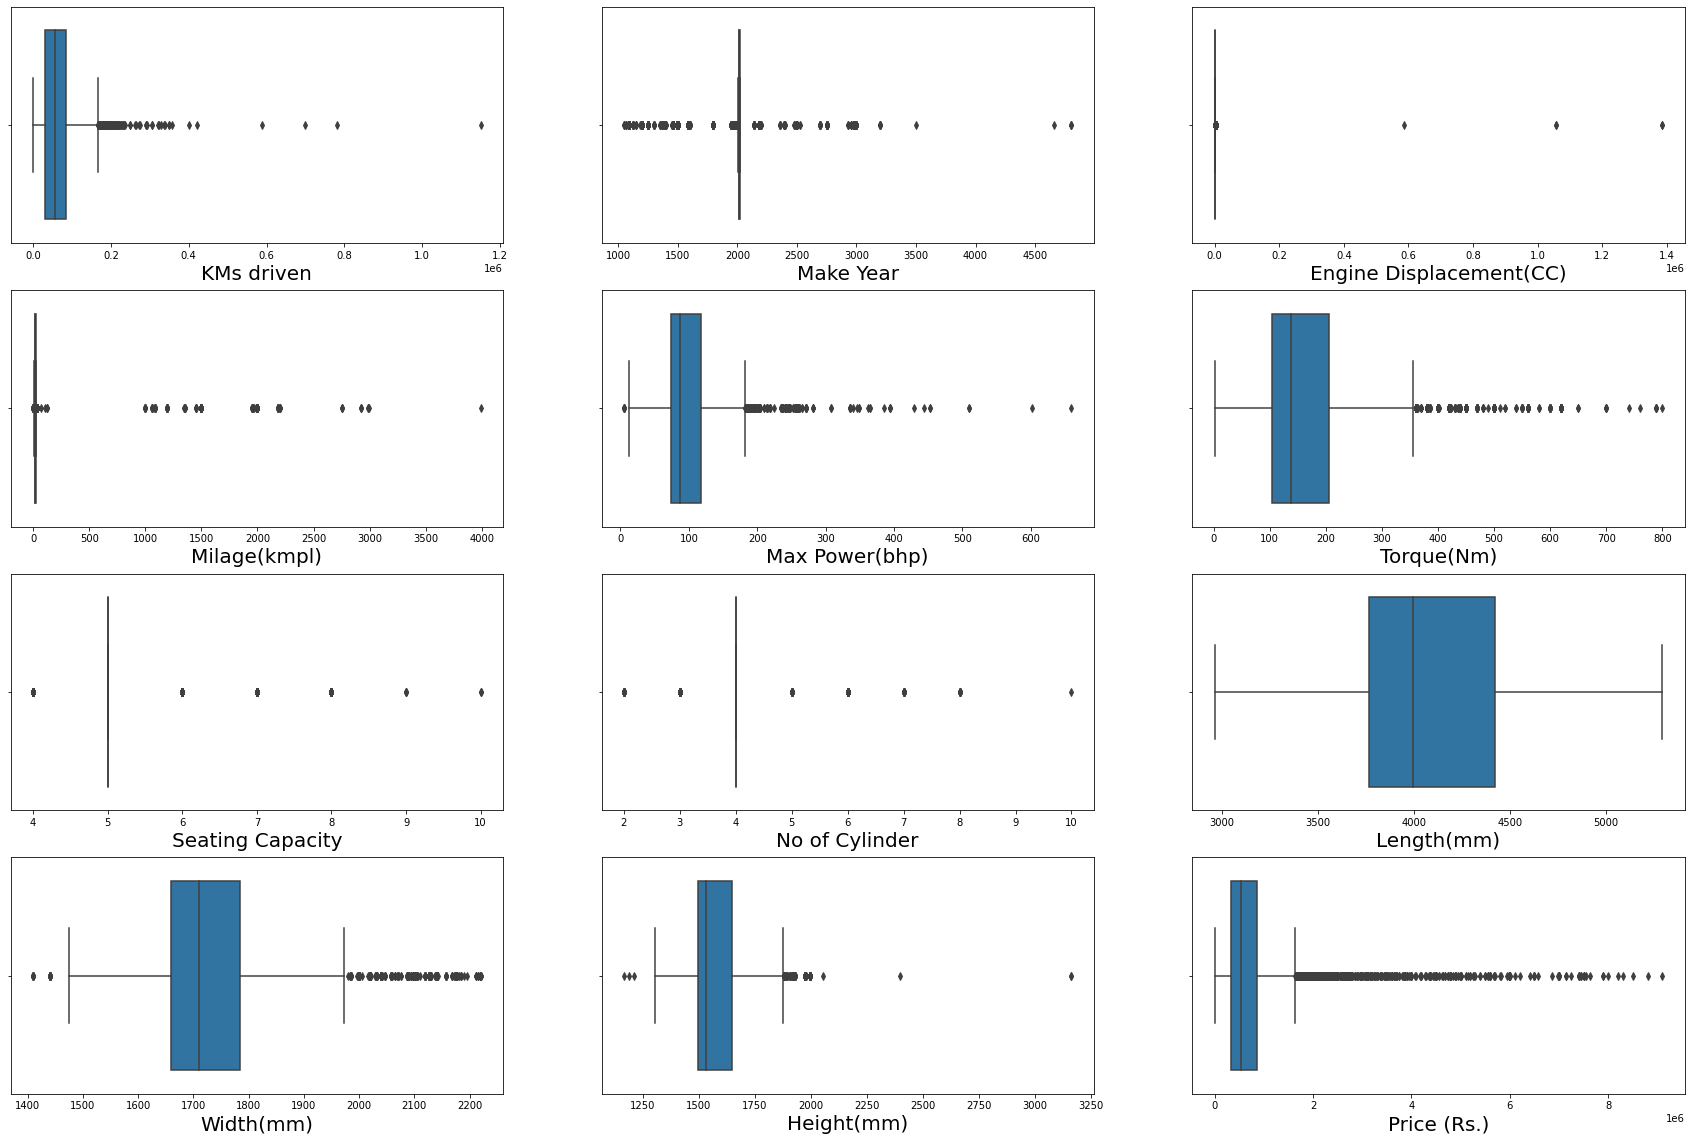

In [ ]:
# Checking outliers in numerical variables (Numerical)
plot=1
plt.figure(figsize=(30,20))
for i in df[Numerical]:
  if plot<=12:
    ax = plt.subplot(4,3,plot)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=20)
  plot+=1
plt.show()

In [ ]:
df['Make Year'].fillna(df['Make Year'].median(), inplace = True)
df['Engine Displacement(CC)'].fillna(df['Engine Displacement(CC)'].median(), inplace = True)
df['Milage(kmpl)'].fillna(df['Milage(kmpl)'].median(), inplace = True)
df['Max Power(bhp)'].fillna(df['Max Power(bhp)'].median(), inplace = True)
df['Torque(Nm)'].fillna(df['Torque(Nm)'].median(), inplace = True)
df['Length(mm)'].fillna(df['Length(mm)'].mean(), inplace = True)
df['Width(mm)'].fillna(df['Width(mm)'].median(), inplace = True)
df['Height(mm)'].fillna(df['Height(mm)'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Unnamed: 0                 0
Make Year                  0
Fuel Type                  0
KMs driven                 0
Engine Displacement(CC)    0
Transmission               0
Milage(kmpl)               0
Max Power(bhp)             0
Torque(Nm)                 0
Seating Capacity           0
Color                      0
Gear Box                   0
Steering Type              0
Front Brake Type           0
Rear Brake Type            0
Cargo Volume               0
Engine Type                0
No of Cylinder             0
Turbo Charger              0
Super Charger              0
Length(mm)                 0
Width(mm)                  0
Height(mm)                 0
Price (Rs.)                0
Car_Brand                  0
Car_Model                  0
dtype: int64

In [ ]:
# Importing Final Clean data in excel file
df.to_excel('UsedCarsCleaned.xlsx') 
files.download('UsedCarsCleaned.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Cargo Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Brand,Car_Model
0,2018.0,Diesel,85000,1396.0,Manual,22.10,88.70,219.7,5.0,White,6 Speed,Power,Disc,Drum,5,U2 CRDI Engine,4.0,Yes,Yes,4270.0,1780.0,1665.0,930000.0,Hyundai Creta,1.4 E Plus CRDi
1,2022.0,Petrol,7000,999.0,Manual,19.17,71.01,96.0,5.0,Brown,5 Speed,Disc,"Tubeless,Radial",Drum,5,1.0L energy,3.0,Yes,Yes,3991.0,1750.0,1605.0,831000.0,Renault Kiger,RXZ
2,2017.0,Petrol,25035,1199.0,Manual,18.70,88.70,110.0,5.0,Red,5 Speed,Power,Disc,Drum,354,i-VTEC Petrol Engine,4.0,Yes,Yes,3955.0,1694.0,1544.0,565000.0,Honda Jazz,1.2 V i VTEC
3,2018.0,Petrol,13000,1373.0,Manual,20.73,91.10,130.0,5.0,Blue,5 Speed,Power,Ventilated Disc,Drum,510,k14B VVT Engine,4.0,No,No,4490.0,1730.0,1485.0,835000.0,Maruti Ciaz,1.4 Alpha
4,2014.0,Petrol,25600,1197.0,Manual,18.60,85.80,114.0,5.0,Red,5 Speed,Power,Ventilated Disc,Drum,5,K Series Petrol Engine,4.0,No,Yes,3850.0,1695.0,1530.0,465000.0,Maruti Swift,ZXI


# **Statistical Matrix**

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='gist_gray')

,count,mean,std,min,25%,50%,75%,max
Make Year,8704.000000,2016.101907,2.961289,1993.000000,2016.000000,2016.000000,2017.000000,2022.000000
KMs driven,8704.000000,62179.413373,44143.435204,107.000000,30717.250000,57001.000000,85000.000000,1150000.000000
Engine Displacement(CC),8704.000000,2036.698667,27111.123915,0.000000,1197.000000,1248.000000,1498.000000,1386000.000000
Milage(kmpl),8704.000000,52.444436,243.040405,0.000000,17.000000,19.020000,21.900000,3990.000000
Max Power(bhp),8704.000000,99.064455,42.023174,5.000000,74.000000,87.200000,115.000000,659.780000
Torque(Nm),8704.000000,170.135580,106.926308,2.000000,109.000000,138.000000,200.000000,800.000000
Seating Capacity,8704.000000,5.162109,0.598003,4.000000,5.000000,5.000000,5.000000,10.000000
No of Cylinder,8704.000000,3.792969,0.546676,2.000000,4.000000,4.000000,4.000000,10.000000
Length(mm),8704.000000,4090.237950,399.293703,2961.000000,3765.000000,3995.000000,4420.000000,5295.000000
Width(mm),8704.000000,1718.690487,129.407163,1410.000000,1660.000000,1710.000000,1780.000000,2220.000000


* All Numerical value except few have value of mean greater than median

* If we look at minimum value column, clearly there exist error in columns of **Engine Displacement(CC) and Milage(kmpl)** as there minimum value cannot be zero

* Most of the Columns contain outliers as seen by comparison of 75% column & max column

* Average Used car price is **7.74 lakh** while maximum price is **91 lakh**

In [ ]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Fuel Type,Transmission,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Cargo Volume,Engine Type,Turbo Charger,Super Charger,Car_Brand,Car_Model
count,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704
unique,5,4,385,37,7,75,196,187,440,61,58,229,2144
top,Petrol,Manual,White,5 Speed,Power,Disc,Drum,5,In-Line Engine,Yes,Yes,Maruti Swift,VXI
freq,5047,5716,2952,6134,7420,3729,5700,5637,854,7815,7964,638,115


* Majority of car are **5 seater with 5 speed gearbox having power steering facility**

* Almost 60% of cars are **Petrol driven**

* Most prefer color is white with **mannual transmission**

* Almost 90% of cars contain **Super Charger and Turbo charger**

# **Exploratory Data Analysis**

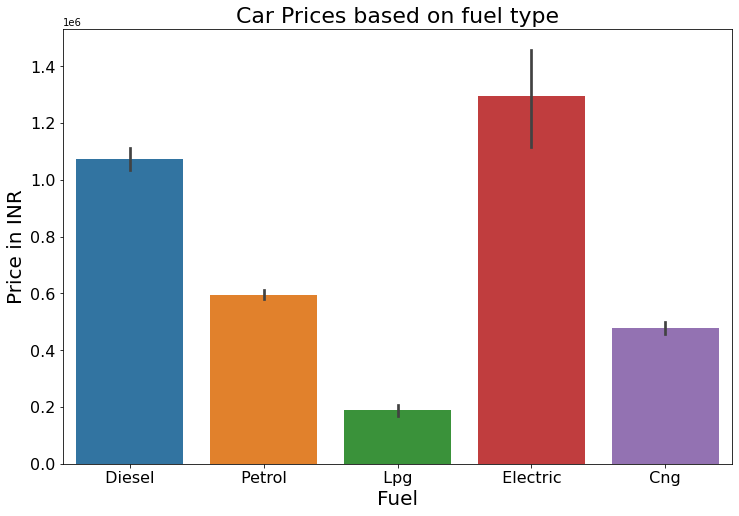

In [ ]:
plt.figure(figsize=(12,8))
p = sns.barplot(x=df['Fuel Type'],y=df['Price (Rs.)'])
plt.title('Car Prices based on fuel type', fontsize=22)
p.set_xlabel('Fuel',fontsize=20)
p.set_ylabel('Price in INR',fontsize=20)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
df['Fuel Type'].value_counts()

 Petrol       5047
 Diesel       3305
 Cng           293
 Lpg            30
 Electric       29
Name: Fuel Type, dtype: int64

* **Only 29 electric vehicles out of 8704 cars and still electric vehicle are costliest.There are several factors that contribute to the higher cost of electric vehicles (EVs) compared to traditional gasoline-powered cars**

  * Battery technology: The battery is one of the most expensive components of an EV, and as the technology continues to improve, the cost may decrease

  * Low production volumes: Currently, there are relatively low production volumes for EVs compared to traditional vehicles, which can lead to higher costs due to economies of scale

* **Diesel engines tend to retain their value better than petrol engines, which can contribute to higher prices for used diesel vehicles**

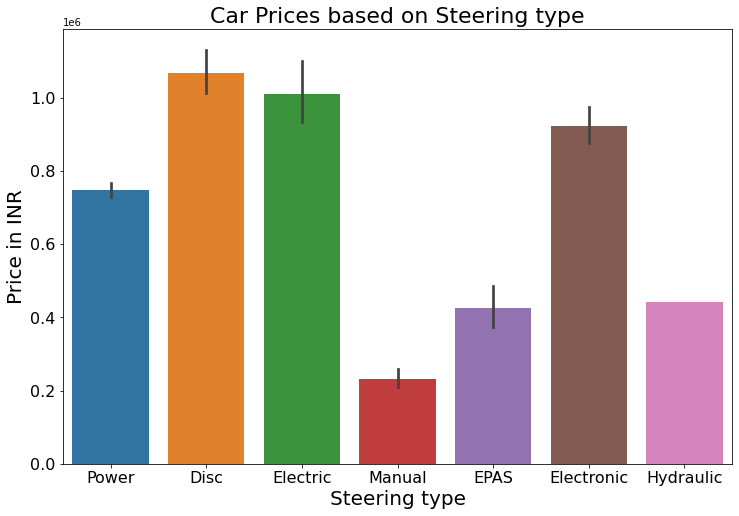

In [ ]:
plt.figure(figsize=(12,8))
p = sns.barplot(x=df['Steering Type'],y=df['Price (Rs.)'])
plt.title('Car Prices based on Steering type', fontsize=22)
p.set_xlabel('Steering type',fontsize=20)
p.set_ylabel('Price in INR',fontsize=20)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
df['Steering Type'].value_counts()

Power         7420
Disc           545
Electric       513
Manual         156
Electronic      53
EPAS            16
Hydraulic        1
Name: Steering Type, dtype: int64

**The type of steering in a used car can have some impact on its value, but it is not typically a significant factor. The price of a used car is usually influenced more by factors such as age, make and model, mileage, condition, and history**

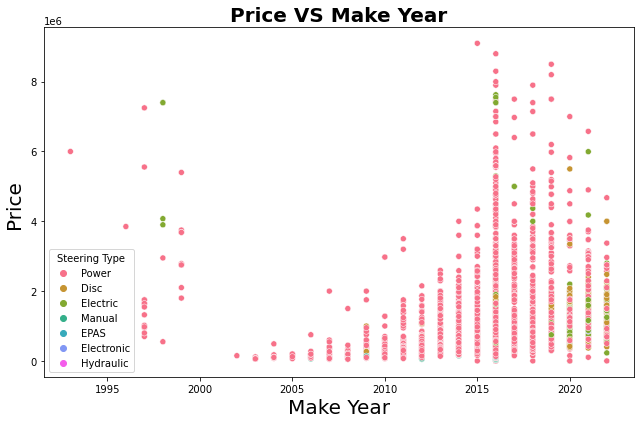

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Make Year'], hue =df['Steering Type'])
plt.title("Price VS Make Year",fontsize=20,fontweight ='bold')
plt.xlabel('Make Year',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

* Generally, older cars are cheaper, but their condition also affects their value

* A used car in excellent condition will be worth more than one in poor condition, even if it is newer

* As it can be seen that some power steering 2015 cars are costlier than 2020 manufactured cars

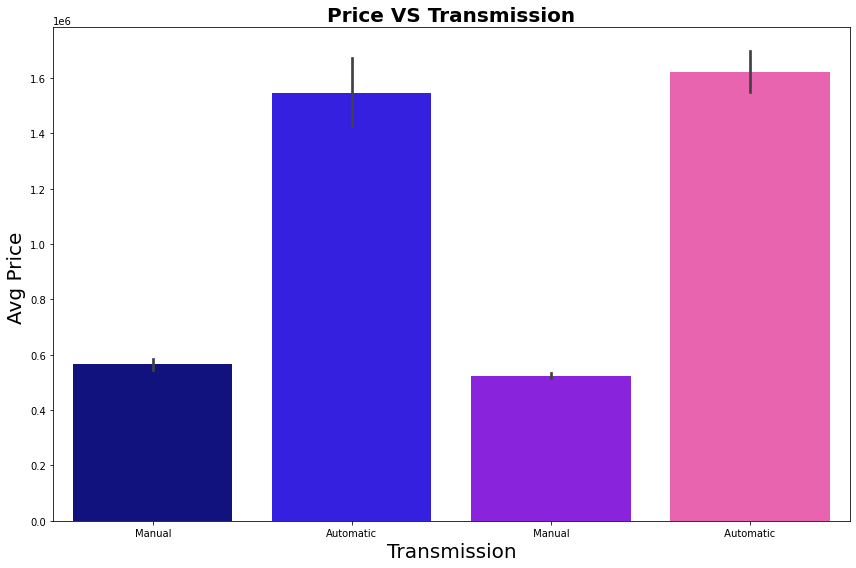

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(12,8))
sns.barplot(y=df['Price (Rs.)'],x=df['Transmission'])
plt.title("Price VS Transmission",fontsize=20,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

**Used cars with a manual transmission are less expensive than car with an automatic transmission as automatic transmissions tend to be more complex and expensive to repair**

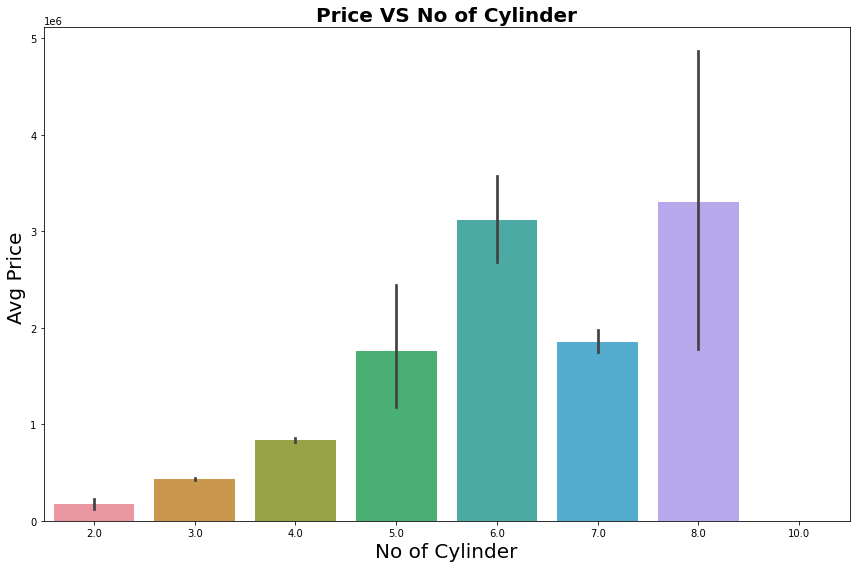

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(12,8))
sns.barplot(y=df['Price (Rs.)'],x=df['No of Cylinder'])
plt.title("Price VS No of Cylinder",fontsize=20,fontweight ='bold')
plt.xlabel('No of Cylinder',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

* In general, cars with more cylinders tend to be more powerful and perform better

* Therefore, they can command a higher price in the used car market

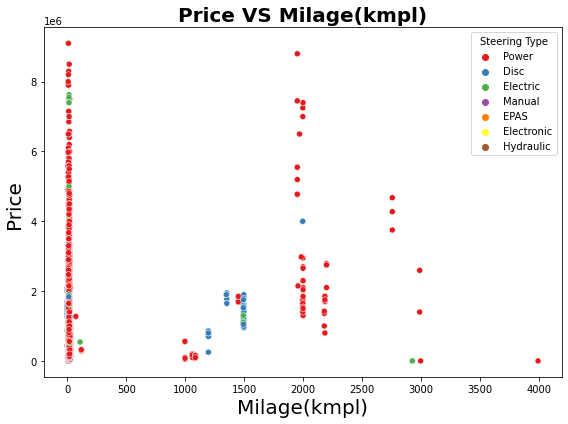

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Milage(kmpl)'],hue =df['Steering Type'])
plt.title("Price VS Milage(kmpl)",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

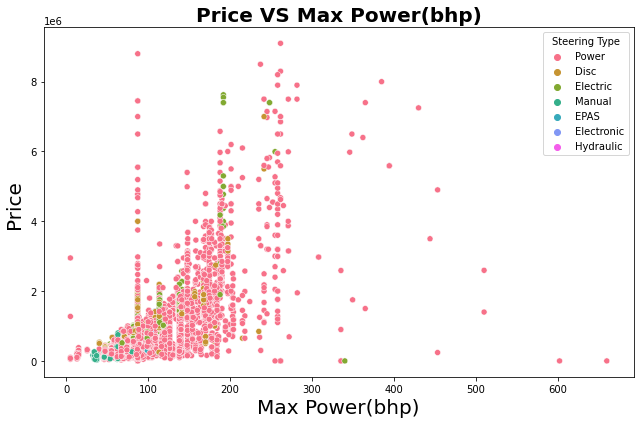

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Max Power(bhp)'], hue =df['Steering Type'])
plt.title("Price VS Max Power(bhp)",fontsize=20,fontweight ='bold')
plt.xlabel('Max Power(bhp)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Generally, cars with higher bhp are considered to be more powerful and sportier, and as a result, they are often priced higher in the used car market**

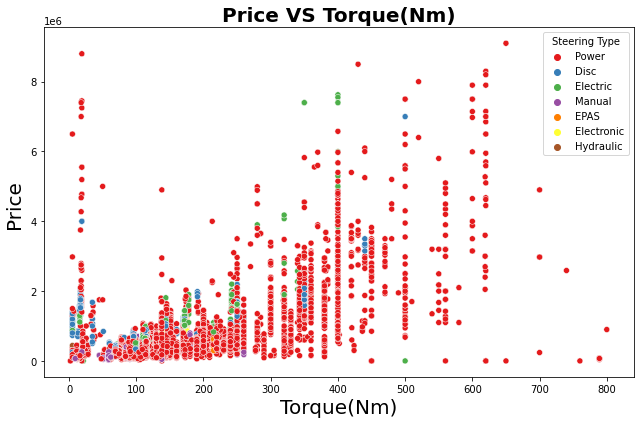

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Torque(Nm)'], hue =df['Steering Type'])
plt.title("Price VS Torque(Nm)",fontsize=20,fontweight ='bold')
plt.xlabel('Torque(Nm)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

* **Torque, which is a measure of a vehicle's rotational force, can affect a vehicle's acceleration and overall performance**

* Vehicles with higher torque ratings typically have more powerful engines

* Hence it can be seen that high torque rating cars have higher prices

# **Feature Engineering**

**1.Encoding Categorical Data**

In [ ]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Cargo Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Brand,Car_Model
0,2018.0,1,85000,1396.0,3,22.10,88.70,219.7,5.0,375,5,6,44,172,130,365,4.0,57,54,4270.0,1780.0,1665.0,930000.0,63,173
1,2022.0,4,7000,999.0,3,19.17,71.01,96.0,5.0,54,3,0,68,172,130,17,3.0,57,54,3991.0,1750.0,1605.0,831000.0,173,1460
2,2017.0,4,25035,1199.0,3,18.70,88.70,110.0,5.0,287,3,6,44,172,81,411,4.0,57,54,3955.0,1694.0,1544.0,565000.0,57,126
3,2018.0,4,13000,1373.0,3,20.73,91.10,130.0,5.0,41,3,6,70,172,139,413,4.0,41,38,4490.0,1730.0,1485.0,835000.0,121,156
4,2014.0,4,25600,1197.0,3,18.60,85.80,114.0,5.0,287,3,6,70,172,130,255,4.0,41,54,3850.0,1695.0,1530.0,465000.0,134,2013


**2. Outliers Detection & Removal**

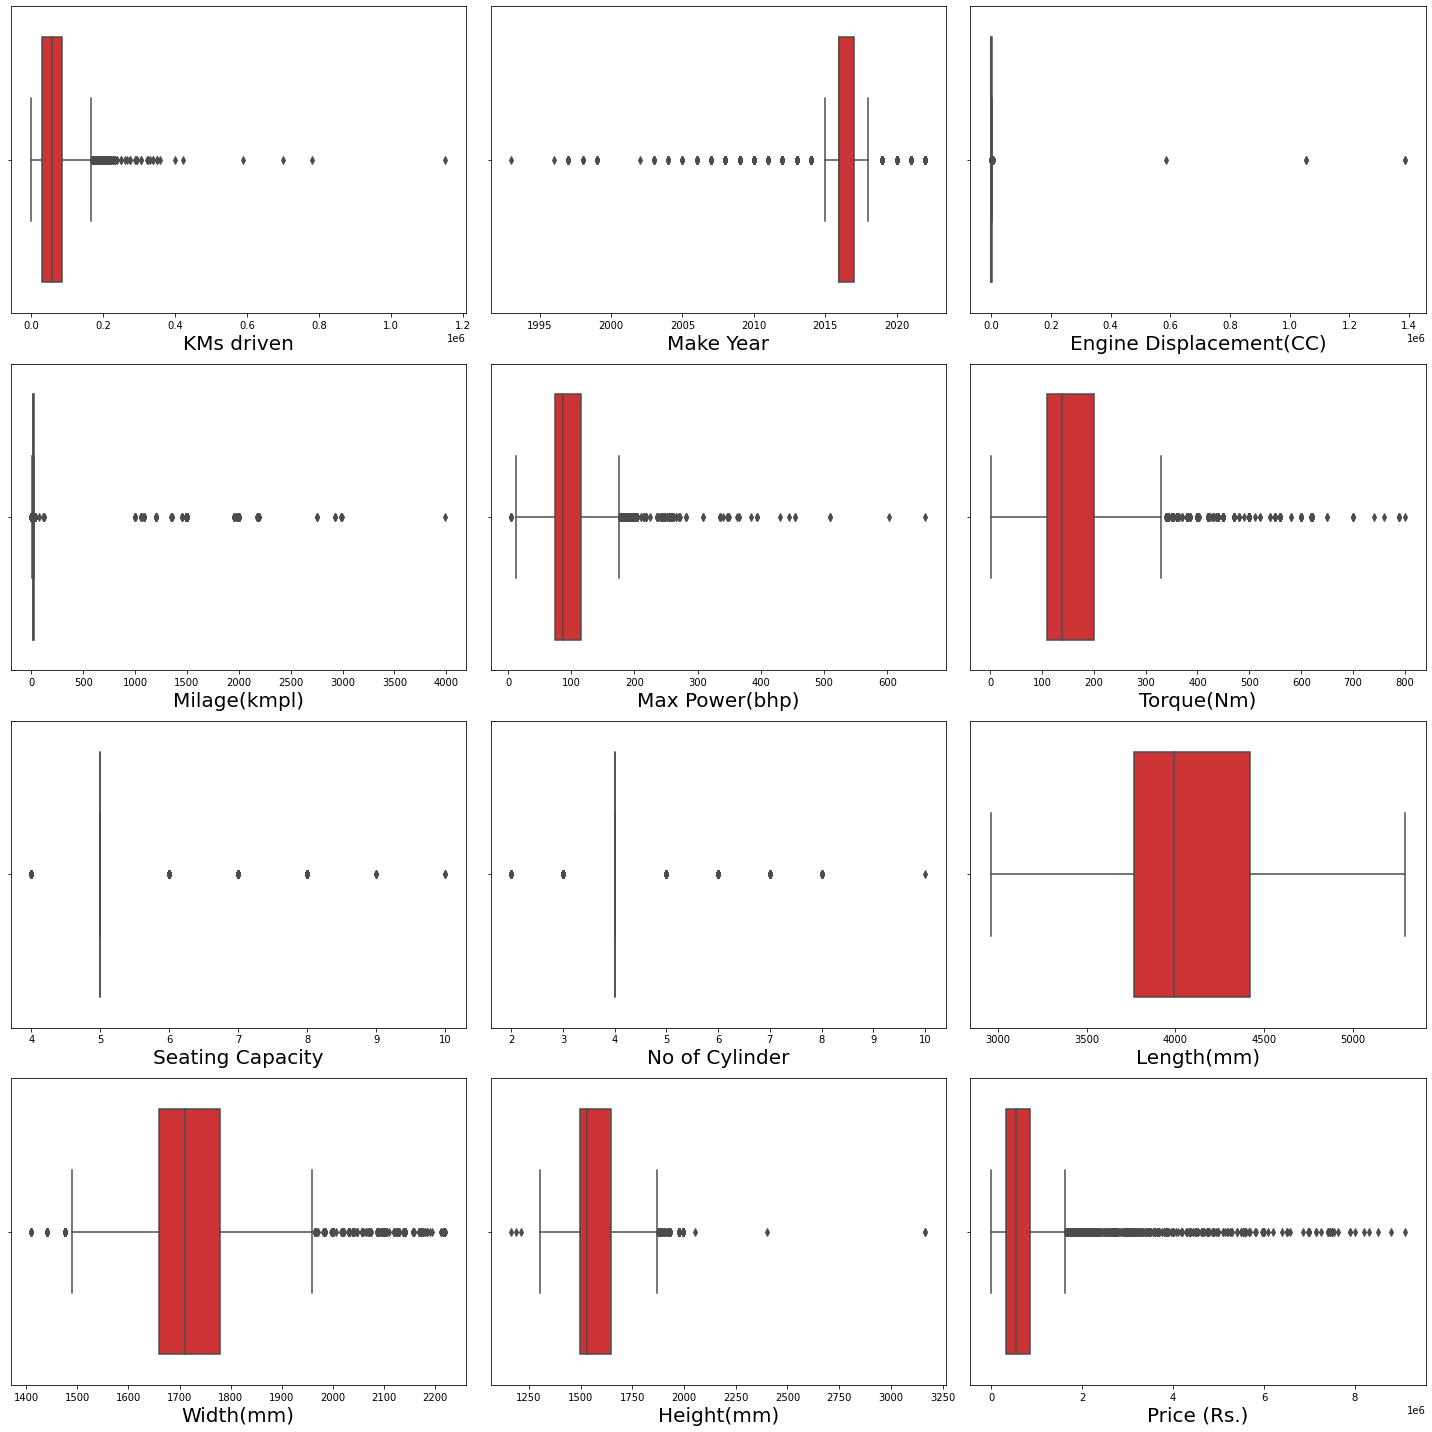

In [ ]:
# Checking outliers in numerical variables (Numerical)
plot=1
plt.figure(figsize=(20,20))
for i in df[Numerical]:
  if plot<=12:
    ax = plt.subplot(4,3,plot)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=20)
  plot+=1
plt.show()

In [ ]:
df.shape

(8704, 25)

In [ ]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df1 = df[filtering_entry]

In [ ]:
df1.shape

(6519, 25)

In [ ]:
print("Data loss in % : ",(df.shape[0] - df1.shape[0])/df.shape[0])

Data loss in % :  0.2510340073529412


* 25% data loss is a huge loss in data but there are many mistakes found in web scraping

* Hence we will remove outliers and proceed ahead for model building so that we can get improved model performance 

**3. Correlation**

In [ ]:
df1.corr()

,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Cargo Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Brand,Car_Model
Make Year,1.000000,0.026523,-0.369142,-0.057140,-0.037679,0.128694,0.045916,0.026644,-0.041682,-0.010779,0.028175,-0.251522,-0.112284,-0.010889,0.057688,-0.078359,-0.064199,-0.003733,0.025489,-0.018317,0.095589,0.151875,0.349471,0.067407,0.018980
Fuel Type,0.026523,1.000000,-0.322583,-0.364050,-0.015544,-0.416001,-0.185610,-0.581505,0.014305,-0.068686,-0.180479,-0.112540,-0.129919,-0.011333,-0.020245,0.014464,-0.181195,-0.072587,-0.065512,-0.278039,-0.313135,-0.233289,-0.211571,-0.025903,0.027011
KMs driven,-0.369142,-0.322583,1.000000,0.185985,-0.094766,0.005807,0.006337,0.151598,0.039877,0.099803,-0.021688,0.216135,0.139098,0.006823,-0.054815,0.069007,0.140602,0.110301,0.071601,0.148189,0.032753,-0.039132,-0.263405,-0.007264,-0.049588
Engine Displacement(CC),-0.057140,-0.364050,0.185985,1.000000,-0.090497,-0.436077,0.784444,0.746192,0.019891,-0.010283,0.418374,0.064091,-0.001431,-0.002251,0.043478,0.168310,0.513311,0.028861,-0.003994,0.761688,0.676927,0.209078,0.519112,-0.063211,-0.102673
Transmission,-0.037679,-0.015544,-0.094766,-0.090497,1.000000,0.129023,-0.141932,-0.153242,-0.024975,-0.065324,-0.206818,0.029359,0.021351,0.085074,0.126050,0.026934,-0.050556,-0.374317,-0.287113,-0.078340,-0.100951,0.056474,-0.126817,0.038134,0.064557
Milage(kmpl),0.128694,-0.416001,0.005807,-0.436077,0.129023,1.000000,-0.469643,-0.167175,0.000958,0.031557,-0.225403,-0.001606,0.108397,-0.012355,-0.026122,-0.090619,-0.264056,-0.014066,0.015856,-0.407518,-0.311495,-0.099540,-0.207402,0.076294,0.099067
Max Power(bhp),0.045916,-0.185610,0.006337,0.784444,-0.141932,-0.469643,1.000000,0.801264,0.028216,-0.059733,0.661685,-0.012319,-0.085225,0.007262,0.034305,0.115938,0.450495,0.006661,-0.041790,0.805941,0.766366,0.059536,0.718017,-0.142037,-0.116728
Torque(Nm),0.026644,-0.581505,0.151598,0.746192,-0.153242,-0.167175,0.801264,1.000000,0.022081,-0.002903,0.591800,0.042486,-0.050250,0.010529,0.035051,0.058362,0.415397,0.070645,0.033631,0.694876,0.741990,0.173834,0.655601,-0.048295,-0.106058
Seating Capacity,-0.041682,0.014305,0.039877,0.019891,-0.024975,0.000958,0.028216,0.022081,1.000000,-0.028416,0.011443,0.009105,-0.014829,-0.008306,-0.019778,0.024183,0.017452,-0.014313,-0.007710,0.055840,0.070439,0.047789,-0.018711,-0.015197,-0.047500
Color,-0.010779,-0.068686,0.099803,-0.010283,-0.065324,0.031557,-0.059733,-0.002903,-0.028416,1.000000,-0.059305,0.042179,0.019984,0.001802,0.009583,-0.017943,0.007830,0.047241,0.024846,-0.040156,-0.048158,0.048754,-0.063130,-0.017564,0.027024


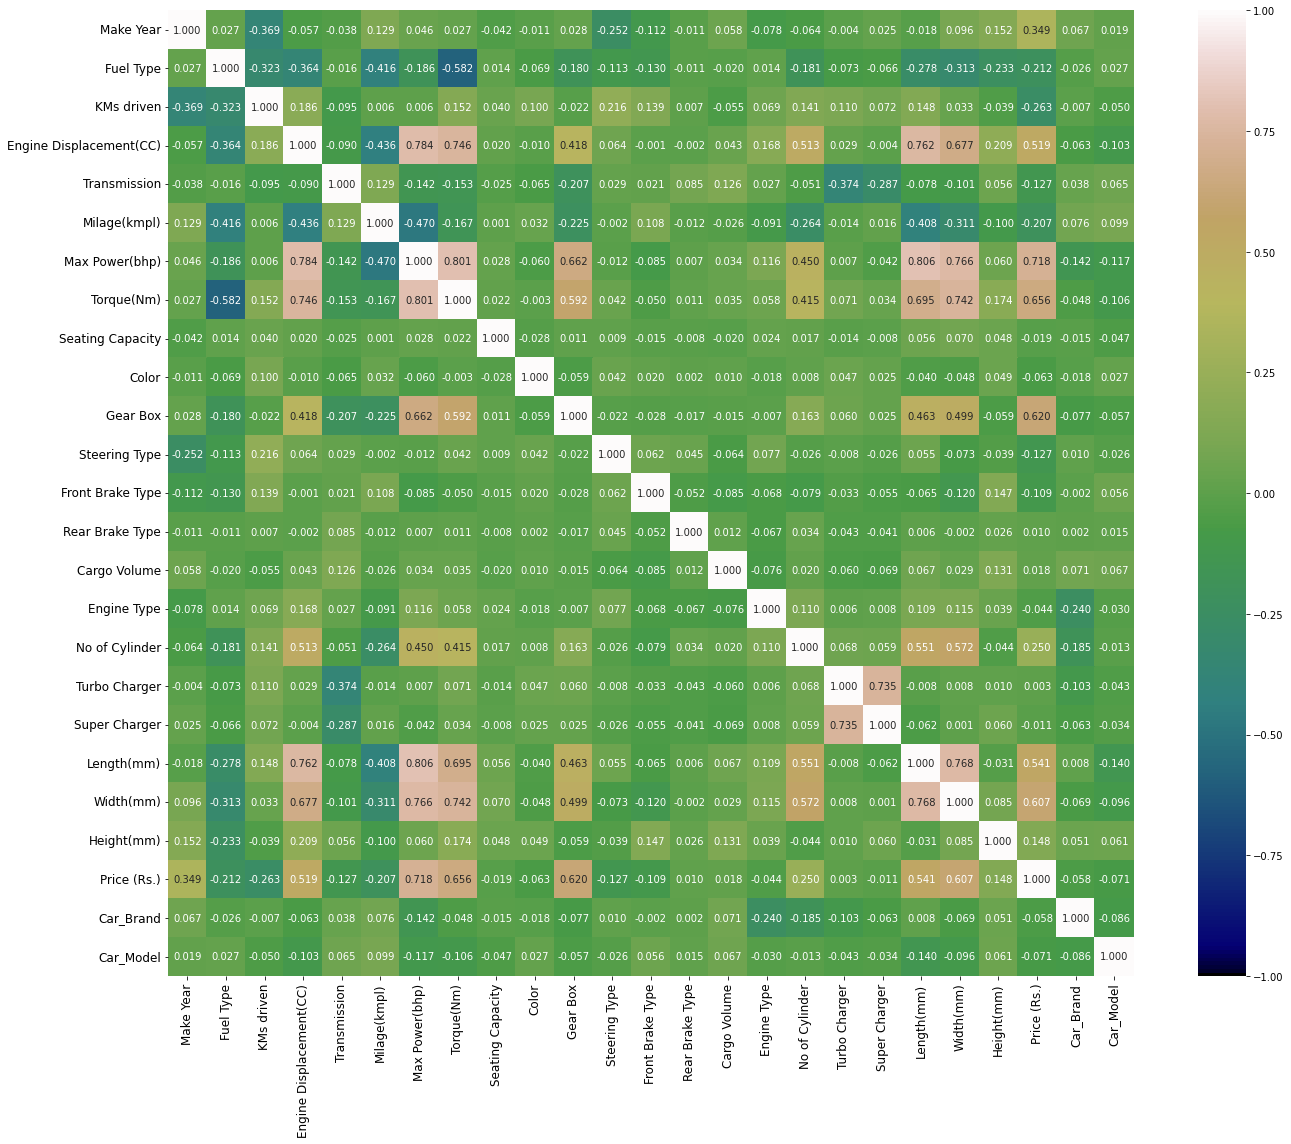

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df1.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_earth')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

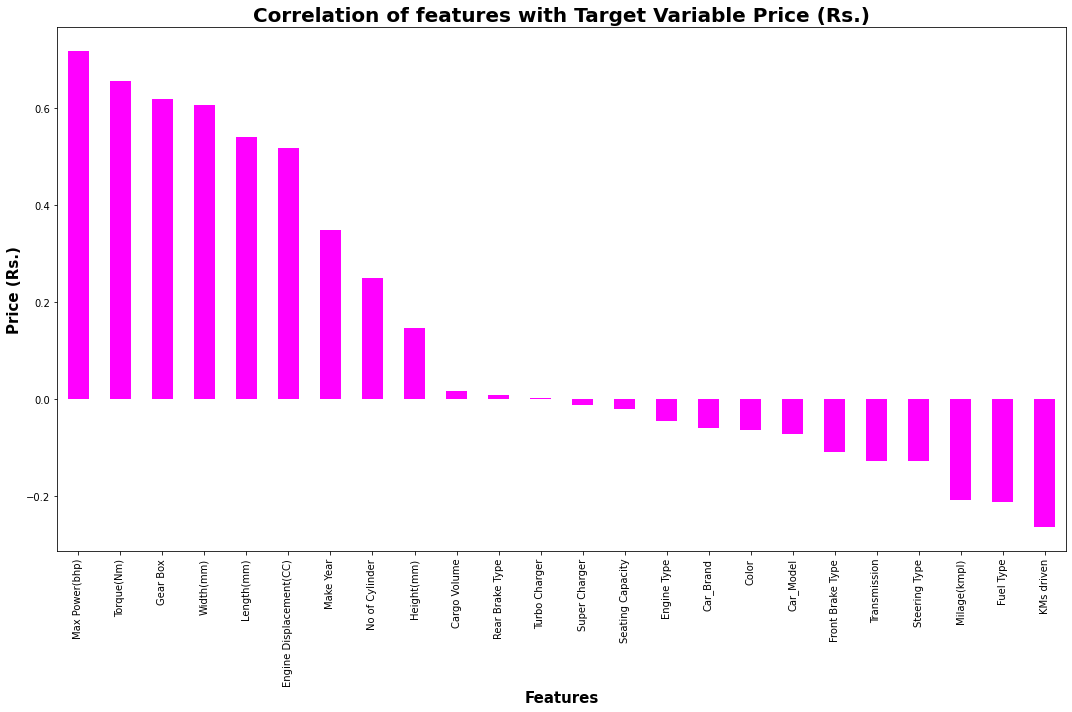

In [ ]:
plt.figure(figsize = (15,10))
df1.corr()['Price (Rs.)'].drop(['Price (Rs.)']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

**4.Skewness Reduction**

In [ ]:
df1.skew()

Make Year                 -0.494137
Fuel Type                 -0.570999
KMs driven                 0.616705
Engine Displacement(CC)    0.837045
Transmission               1.094623
Milage(kmpl)               0.504298
Max Power(bhp)             1.255708
Torque(Nm)                 1.290885
Seating Capacity          -2.746158
Color                     -0.611117
Gear Box                   3.394631
Steering Type             -3.202167
Front Brake Type           0.341373
Rear Brake Type           -3.791323
Cargo Volume              -1.469959
Engine Type               -0.664684
No of Cylinder            -0.993361
Turbo Charger             -3.376497
Super Charger             -3.781991
Length(mm)                 0.413437
Width(mm)                  0.223207
Height(mm)                 1.270141
Price (Rs.)                2.489258
Car_Brand                  0.290103
Car_Model                 -0.107488
dtype: float64

In [5]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [6]:

# Seperating features and target variable for classification task(Rain prediction)

X = df1.drop('Price (Rs.)',axis=1)

y = df1['Price (Rs.)']

In [7]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

Seating Capacity           1.475204
Engine Displacement(CC)    0.356630
Rear Brake Type            0.335138
Super Charger              0.089921
Torque(Nm)                 0.085359
No of Cylinder             0.067368
Max Power(bhp)             0.016045
Width(mm)                  0.005752
Milage(kmpl)               0.004215
Transmission               0.003434
Height(mm)                 0.000000
Length(mm)                 0.000000
Front Brake Type          -0.000433
KMs driven                -0.074569
Car_Brand                 -0.079236
Engine Type               -0.217475
Make Year                 -0.237161
Unnamed: 0                -0.295982
Car_Model                 -0.360585
Color                     -0.521507
Fuel Type                 -0.535760
Gear Box                  -0.544733
Turbo Charger             -0.682444
Cargo Volume              -0.989533
Steering Type             -2.822746
dtype: float64

**5.SCALING USING STANDARD SCALER**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

**6. Checking Multicollinearity in the dataset**

In [ ]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif
     

,vif,Features
0,1.352974,Make Year
1,3.245490,Fuel Type
2,1.494254,KMs driven
3,4.268164,Engine Displacement(CC)
4,1.213397,Transmission
5,2.431313,Milage(kmpl)
6,6.527898,Max Power(bhp)
7,4.699161,Torque(Nm)
8,1.027078,Seating Capacity
9,1.027573,Color


**We can see that no multicollinearity exist between features as vif < 10**

In [ ]:
# Importing Final filtered data in excel file
df1.to_excel('UsedCarsFiltered_ML.xlsx') 
files.download('UsedCarsFiltered_ML.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL BUILDING - REGRESSION TASK (USED CAR PRICE PREDICTION)**

**Best Random State**

In [ ]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
     
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.7007431684442406 at random state  563


In [ ]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train,y_train)
    
    pred_rf = rf.predict(X_test)
   
    score_rf = r2_score(y_test,pred_rf)
     
    
    if score_rf>maxR2score:
   
        maxR2score = score_rf
              
        maxRS = i
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.9284944916827713 at random state  38


**Train Test Split using Best Random State**

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=38)

**LINEAR REGRESSION**

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

cv_score = cross_val_score(lr,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean} and accuracy score for training is {score_train} and accuracy for testing is {score_test}")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Training accuracy: 65.54149091552344
Testing accuracy: 66.8493860040903
At cross fold 5, the cv score is -1.066015696903003 and accuracy score for training is 0.6554149091552344 and accuracy for testing is 0.668493860040903
Root mean squared Error: 254579.12936424883


**LASSO REGULARIZATION**

In [ ]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

66.85056586450729


**KNN REGRESSOR**

In [ ]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

=====K Neighbors Regressor=====
R square score for training dataset for K Neighbors regressor:  0.873623324005411
R square score for test dataset for K Neighbors Regressor:  0.8348740392160161
Cross val score for K Neighbors Regresor: 72.19818381599124
Root mean squared Error: 179673.7728717506


**TUNING PARAMETERS FOR KNN REGRESSOR**

In [ ]:

params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.9998945958761492
R square score for test dataset for K Neighbors Regressor after tuning:  0.8813190757027027
Cross val score for K Neighbors Regresor after tuning: 73.92905641123737
Root mean squared Error for K Neighbors Regressor after tuning: 152323.69588733025


**RANDOM FOREST REGRESSOR**

In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest Regressor:",rmse)

=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 98.547151539832
Testing accuracy for Random Forest model: 92.71938516677734
At cross fold 5, the cv score is 85.75429038259485 
Root mean squared Error for Random Forest Regressor: 119305.65700799602


**TUNING PARAMETERS FOR RANDOM FOREST REGRESSOR**

In [ ]:

params_rf = {'criterion' : ["squared_error", "absolute_error", "poisson"],
             'min_samples_split':(2,3,4,5),
             'min_samples_leaf' :(2,3,4),             
             'max_depth':(10,15,20)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("=====After tuning parameters of Random Forest=====")

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,X_scaler,y,cv=5)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

=====After tuning parameters of Random Forest=====
R2 score for Random Forest Model after tuning: 92.37938894978105
Cross val score for Random Forest model after tuning: 85.49356234290218
Root mean squared Error for Random Forest model after tuning: 122059.58996774405


**ADA BOOST REGRESSOR**

In [ ]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)


=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.5548688552911463
R square score for test dataset for Ada Boost Regressor:  0.47195775006876794
Cross val score for Ada Boost Regresor: 60.37085732954173
Root mean squared Error for ada boost Regressor: 321300.45832848374


**XGBRegressor**

In [10]:
from xgboost import XGBRegressor

XGB=XGBRegressor()

XGB.fit(X_train,y_train)

pred_train = XGB.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for XGB: ", acc_train)

pred_test = XGB.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for XGB: ", acc_test)

xgb_score = cross_val_score(XGB,X_scaler,y,cv=5)

xgb_m = xgb_score.mean()

print("Cross val score for XGB:",xgb_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGB:",rmse)

[07:53:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R square score for training dataset for XGB:  0.9003149123988741
R square score for test dataset for XGB:  0.8916273949013256
[07:53:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross val score for XGB: 81.5950957646453
Root mean squared Error for XGB: 145558.2297811404


**Tuning parameters for XGB**

In [ ]:
params_xgb = {'max_depth':[3,4,5,6],
              'learning_rate':(0.01,0.001,0.1),
              'min_child_weight':(0,1,2),
              'max_delta_step':(0,1,2)
              }

grd_xgb = GridSearchCV(XGB,params_xgb)

grd_xgb.fit(X_train,y_train)

print(grd_xgb.best_params_)

[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
XGB = grd_xgb.best_estimator_

XGB.fit(X_train,y_train)

XGB.score(X_train,y_train)

pred_train = XGB.predict(X_train)

pred_test = XGB.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(XGB,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[07:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 96.72905877107014
Testing accuracy for XGradient Boost model: 92.90096570221175
[07:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 85.28577967589462 
Root mean squared Erro

**ExtraTreesRegressor Model**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()

et.fit(X_train,y_train)

pred_train = et.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for ExtraTreesRegressor: ", acc_train)

pred_test = et.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for ExtraTreesRegressor: ", acc_test)

et_score = cross_val_score(et,X_scaler,y,cv=5)

et_m = et_score.mean()

print("Cross val score for ExtraTreesRegressor:",et_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Extra Trees Regressor:",rmse)

R square score for training dataset for ExtraTreesRegressor:  0.9998609584489115
R square score for test dataset for ExtraTreesRegressor:  0.9283944066600185
Cross val score for ExtraTreesRegressor: 81.66774465513879
Root mean squared Error for Extra Trees Regressor: 118317.9080779557


**XGB model** gives the best result for the given dataset as there is least difference between training and test accuracy

As we get **test accuracy as 89.16%*** and* **training accuracy as 90%**

After **hyperparameter tuning**, **training accuracy increased to 96.73%** and **test accuracy to 92.9%**

Cross validation scores is also looking best among other models as 85.28%

# **Saving the Model**

In [11]:
import pickle
filename = 'Car_price_prediction_reg.pkl'
pickle.dump(XGB,open(filename,'wb'))

# **Prediction of test dataset using saved model**

In [12]:

loaded_model = pickle.load(open('Car_price_prediction_reg.pkl','rb'))
result = loaded_model.predict(X_test)
result

[07:56:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 468818.44,  513558.53,  697723.1 , ..., 1029955.3 ,  815025.94,
        261278.8 ], dtype=float32)

In [13]:
CarPrice_test = pd.DataFrame()
CarPrice_test['CarPrice']= result
CarPrice_test.head()

,CarPrice
0,468818.43750
1,513558.53125
2,697723.12500
3,614490.81250
4,285468.00000


In [14]:
pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303
Predicted,468818.4375,513558.53125,697723.125,614490.8125,285468.0,739079.8125,145714.625,256513.9375,1385891.875,524533.6875,...,744143.8125,260061.140625,226684.078125,577964.25,809644.375,705348.375,558741.1875,1.029955e+06,815025.9375,261278.796875
Actual,475000.0000,500000.00000,750000.000,700000.0000,150000.0,975000.0000,125000.000,385000.0000,1340000.000,619000.0000,...,850000.0000,200000.000000,230000.000000,820000.00,751000.000,750000.000,470000.0000,1.000000e+06,625000.0000,295000.000000
